# Hypothesis 

## Product level hypotheses:

<ol>1. Brand: Branded products have more trust of the customers so they should have high sales.</ol>
<ol>2. Visibility in Store: The location of the product placement also depends on the sales.</ol>
<ol>3. Utility: Daily use products have a higher tendency to sell compared to other products.</ol>
<ol>4. Packaging: Quality packaging can attract customers and sell more</ol>

## Store level hypotheses:

<ol>1. City type: Stores located in urban cities should have higher sales.</ol>
<ol>2. Store Capacity: One-stop shops are big in size so their sell should be high.</ol>
<ol>3. Population density: Densely populated areas have high demands so the store located in these areas should have higher sales.</ol>
<ol>4. Marketing: Stores having a good marketing division can attract customers through the right offers.</ol>

Source : https://ai.plainenglish.io/big-mart-sales-prediction-project-tutorial-2de2414cdf2e 

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

C:\Python\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#reading big mart sales data
data = pd.read_csv('train_data.csv')
test =  pd.read_csv('test_data.csv')

In [3]:
#looking at the first five rows of data
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 1 Numerical Variables

### 1.1 Item_Weight and Item_Outlet_Sales Analysis

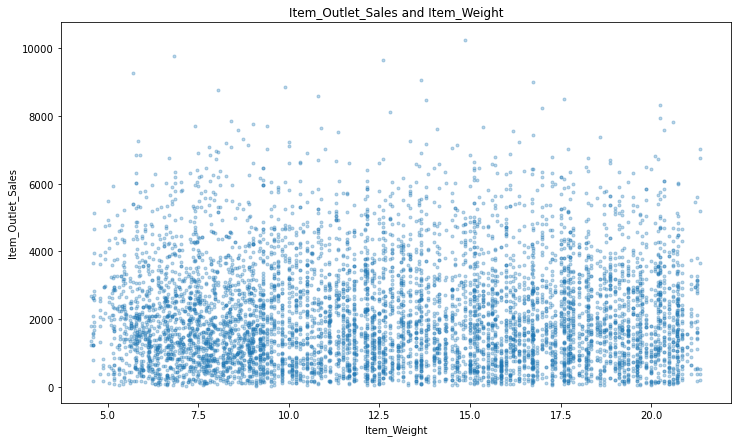

In [4]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Outlet_Sales and Item_Weight")
plt.plot(data['Item_Weight'],data['Item_Outlet_Sales'],'.',alpha=0.3)

Observation : Item_Weight has really very low correlation with Item_Output_Sales

### 1.2 Item_Visibility and Item_Outlet_Sales Analysis

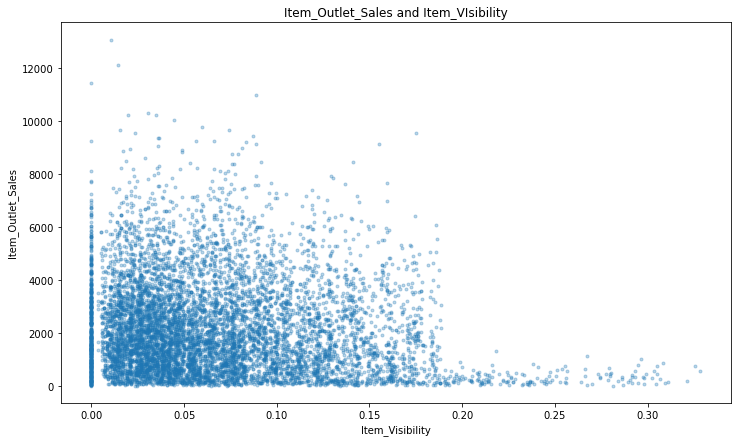

In [5]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Outlet_Sales and Item_VIsibility")
plt.plot(data['Item_Visibility'],data['Item_Outlet_Sales'],'.',alpha=0.3)

Observation : We cant make any sense out of it

### 1.3 Item_MRP and Item_Outlet_Sales Analysis

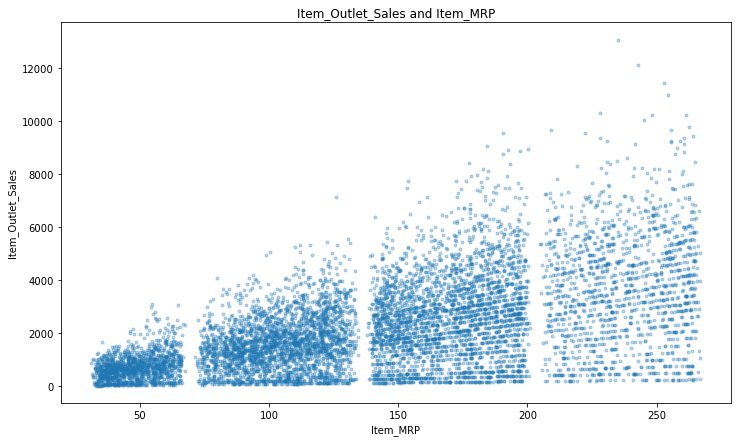

In [6]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Outlet_Sales and Item_MRP")
plt.plot(data['Item_MRP'],data['Item_Outlet_Sales'],'.',alpha=0.3)

Observation : Item_MRP shows certain pattern and have good correlation with Item_Outlet_Sales

### 1.4 Outlet_Establishment_Year and Item_Outlet_Sales Analysis

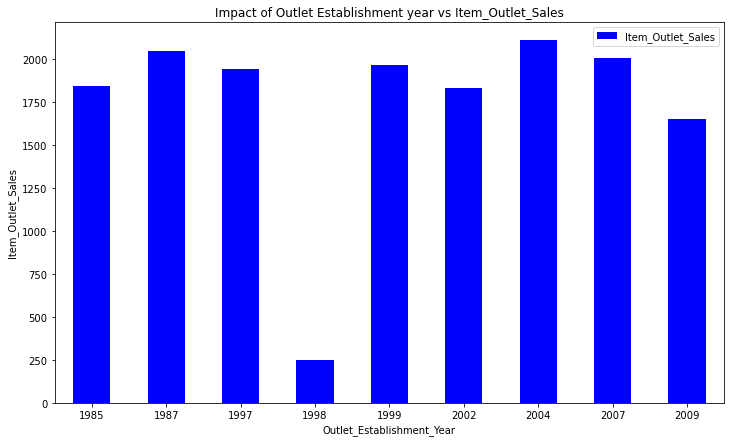

In [7]:
Outlet_Establishment_Year_pivot = data.pivot_table(index='Outlet_Establishment_Year',values='Item_Outlet_Sales',aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar',color='blue',figsize=(12,7))

plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet Establishment year vs Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Observations : There seem to be no correlation between Outlet_Establishment_Year with Item_Outlet_Sales

## 2 Categorical Variables

### 2.1 Impact of Item_Fat_Content on Item_Outlet_Sales

In [8]:
#create the mapping dictionary
"""
mapping = {
    'Low Fat' : 'LF',
    'LF' : 'LF',
    'low fat' : 'LF',
    'reg' : 'Reg',
    'Regular' : 'Reg'
}
data.Item_Fat_Content = data.Item_Fat_Content.map(mapping)
data['Item_Fat_Content'].value_counts()"""

"\nmapping = {\n    'Low Fat' : 'LF',\n    'LF' : 'LF',\n    'low fat' : 'LF',\n    'reg' : 'Reg',\n    'Regular' : 'Reg'\n}\ndata.Item_Fat_Content = data.Item_Fat_Content.map(mapping)\ndata['Item_Fat_Content'].value_counts()"

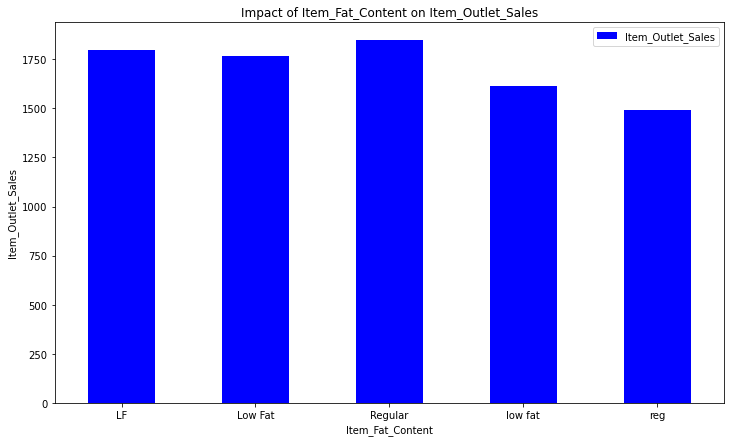

In [9]:
Item_Fat_Content_pivot = data.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar',color='blue',figsize=(12,7))

plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_Fat_Content on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

Observation : Low Fat products seems to have higher sales compare to Regular products

### 2.2 Impact of Outlet_Identifier on Item_Outlet_Sales

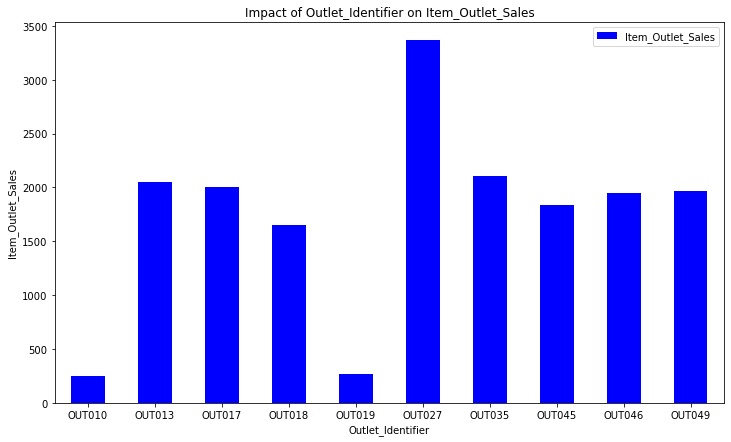

In [10]:
Outlet_Identifier_pivot = data.pivot_table(index='Outlet_Identifier',values='Item_Outlet_Sales',aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar',color='blue',figsize=(12,7))

plt.xlabel('Outlet_Identifier')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Identifier on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

Observation : Out of 10 : There are 2 Groceries store,6 Supermarket Type1, 1 Supermarket Type2,1 SuperMarket Type3

It can be found out using following pivot table

In [11]:
data.pivot_table(values='Outlet_Type',columns='Outlet_Identifier',aggfunc= lambda x : x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [12]:
data.pivot_table(values='Outlet_Type',columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


Observation : Outlet with Identifier OUT027 is Supermarket Type 3 with Medium size store. It is giving us the highest sales

### 2.3 Impact of Outlet_Size on Item_Outlet_Sales

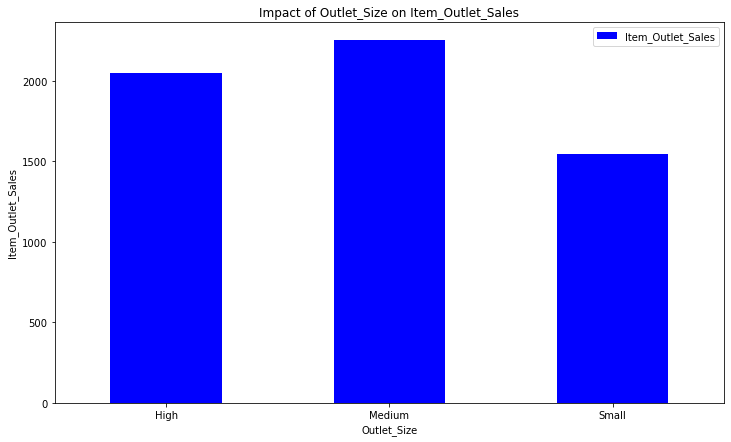

In [13]:
Outlet_Size_pivot = data.pivot_table(index='Outlet_Size',values='Item_Outlet_Sales',aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar',color='blue',figsize=(12,7))

plt.xlabel('Outlet_Size')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Size on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

Observation : Medium Outlet size have higher impact on sales than the other two

### 2.4 Impact of Outlet_Type on Item_Outlet_Sales

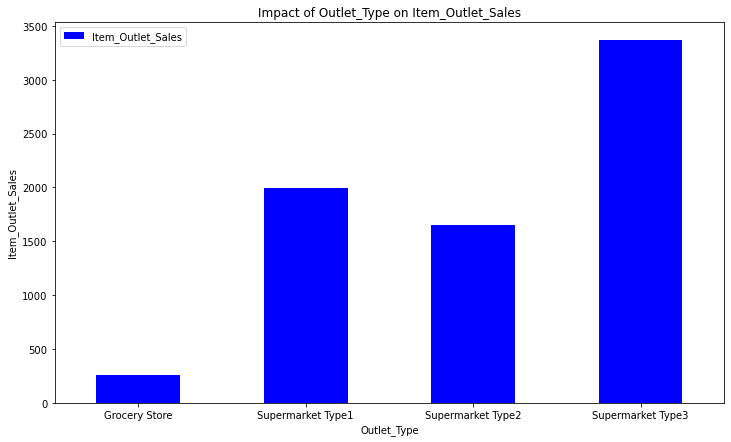

In [15]:
Outlet_Type_pivot = data.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales',aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar',color='blue',figsize=(12,7))

plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Type on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

Observation : It looks like Store size plays an important role in sales. Feature Engg is needed to create more features

### 2.5 Impact of Outlet_Location_Type on Item_Outlet_Sales

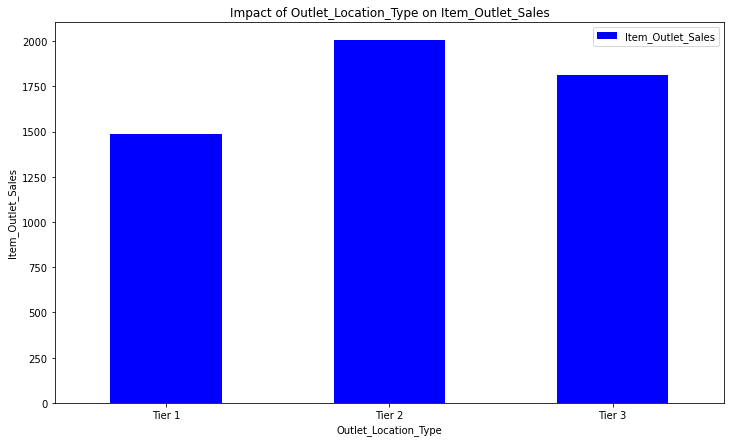

In [16]:
Outlet_Location_Type_pivot = data.pivot_table(index='Outlet_Location_Type',values='Item_Outlet_Sales',aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar',color='blue',figsize=(12,7))

plt.xlabel('Outlet_Location_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_Location_Type on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

Observation : It seems that Tier2 city has better sales than Tier1 and Tier3. Hypothesis proved wrong in this case

In [17]:
data.pivot_table(values='Outlet_Location_Type',columns='Outlet_Type',aggfunc= lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3
